In [1]:
import matplotlib.pyplot as plt

In [2]:
# sudo pip install mcareader
import mcareader as mca

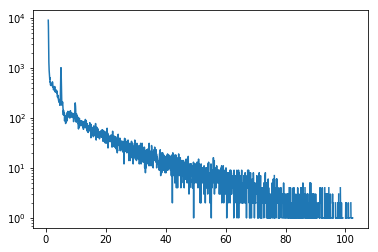

In [3]:
s = mca.Mca("demo.mca")
s.plot(log_y=True)

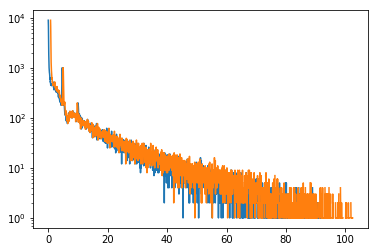

In [4]:
# Get the points using different calibration methods. Both are linear.
x, y = s.get_points(calibration_method="interpolation")
x2, y2 = s.get_points(calibration_method="bestfit")
plt.semilogy(x, y)
plt.semilogy(x2, y2)
plt.show()

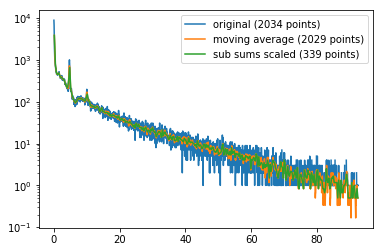

In [5]:
# Example: Two methods to smooth the results
import numpy as np


def moving_average(x, num=2):
    """Smooth using a moving average"""
    if num == 1:
        return x
    return np.convolve(x, np.ones((num,))/num)[(num-1):-num+1]


def sub_sum(x, num=2):
    """Re-bin by adding counts"""
    if num == 1:
        return x
    # If len(x) is not divisible by num, drop the last len(x) % num bins
    return np.asarray([sum(x[i:i+num]) for i in range(0, len(x)-len(x)%num, num)])

smooth = 6
plt.semilogy(x, y, label="original (%d points)"% len(x))

plt.semilogy(moving_average(x, smooth), moving_average(y, smooth),
             label="moving average (%d points)" % len(moving_average(x, smooth)))

plt.semilogy(sub_sum(x, smooth)/smooth, sub_sum(y, smooth)/smooth,
             label="sub sums scaled (%d points)" % len(sub_sum(x, smooth)))
 
plt.legend()
plt.show()
# Here y must be understand as a density: the number of counts is the AREA under the curve.

In [6]:
# Get some data from the file
real_time = float(s.get_variable("REAL_TIME"))
print(real_time)

100.0
